In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option("display.max_row", 4000)
# 위치 별로 찍어 볼 것
from mpl_toolkits.basemap import Basemap

In [2]:
pwd

'C:\\Users\\user\\Desktop\\해상 물류 대회\\ais_baltic_sea'

Dataset
- IEEE DataPort: baltic해의 AIS 데이터
- 태평양을 지나는 선박의 AIS 데이터가 있고 우리나라 선박이 포함된 데이터면 좋을 것 같습니다.
- 해당 데이터는 프로젝트와는 상관성은 떨어지지만 만약 AIS 데이터를 확보한다면 어떤 식으로 확보하는 게 좋을까 하는 차원에서 열어봤습니다
- 아직 많은 분석을 진행하진 못했습니다.

In [3]:
train = pd.read_csv("./training_set.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_6584\3419344267.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./training_set.csv")


In [4]:
print(train.columns)
train.drop(columns = "Unnamed: 0", inplace = True)

Index(['Unnamed: 0', 'timestamp', 'mmsi', 'lat', 'lon', 'speed', 'course',
       'heading', 'turnrate', 'breadth', 'vessel_type', 'vessel_max_speed',
       'draft', 'power', 'dwt', 'iceclass'],
      dtype='object')


In [5]:
# timestamp: 관측 시점, mmsi: 식별번호, lat: 위도, lon: 경도, vessel_type: 선박 type, vessel_max_speed: type 별로 선박의 최대 속도
train.head()

timestamp       mmsi        lat        lon  speed  course  \
0  2017-11-02 11:19:07  205366000  54.347242   9.991140   4.01    56.6   
1  2017-11-02 11:30:58  205366000  54.360348  10.025337   4.17    77.5   
2  2017-11-02 11:37:58  205366000  54.359573  10.049203   4.48    92.4   
3  2017-11-02 11:44:07  205366000  54.365497  10.071320   3.81    44.9   
4  2017-11-02 11:56:08  205366000  54.370437  10.109498   2.73   103.6   

   heading  turnrate  breadth vessel_type  vessel_max_speed  draft   power  \
0     56.0       0.0    21.33           T              16.0   8.18  5820.0   
1     81.0       0.0    21.33           T              16.0   8.18  5820.0   
2     92.0       0.0    21.33           T              16.0   8.18  5820.0   
3     46.0       0.0    21.33           T              16.0   8.18  5820.0   
4    103.0       0.0    21.33           T              16.0   8.18  5820.0   

       dwt iceclass  
0  13289.0       IA  
1  13289.0       IA  
2  13289.0       IA  
3  13289.0       IA  
4  13289.0       IA

In [7]:
np.unique(train["mmsi"], return_counts = True)

(array([205366000, 205437000, 205451000, ..., 257182000, 257207000,
        257222000], dtype=int64),
 array([ 3545,  1267,   236, ..., 24706,  7710, 14584], dtype=int64))

In [23]:
# 1차적으로 해당 데이터 셋을 좁혀서 진행
# mmsi: 205366000
check1 = train[(train["mmsi"] == 257182000) & (train["timestamp"] < "2018-02")]
check1

timestamp       mmsi        lat        lon  speed  course  \
14138046  2017-11-01 09:26:48  257182000  54.318312  10.141277   0.00   199.1   
14138047  2017-11-01 10:08:47  257182000  54.318322  10.141282   0.00   306.7   
14138048  2017-11-01 10:41:47  257182000  54.318298  10.141292   0.00   286.3   
14138049  2017-11-01 11:14:47  257182000  54.318323  10.141290   0.00   358.1   
14138050  2017-11-01 11:44:47  257182000  54.318323  10.141278   0.00   226.4   
...                       ...        ...        ...        ...    ...     ...   
14145612  2018-01-15 05:35:25  257182000  59.197957  10.654258   9.83   350.7   
14145613  2018-01-15 05:45:31  257182000  59.251962  10.636378  10.19   350.2   
14145614  2018-01-15 05:55:37  257182000  59.305685  10.617872   9.31   350.2   
14145615  2018-01-15 06:05:43  257182000  59.353357  10.602125   7.82   350.3   
14145616  2018-01-15 06:15:49  257182000  59.398578  10.585240  10.03   341.4   

          heading  turnrate  breadth vessel_type  vessel_max_speed  draft  \
14138046     39.0      1.12    41.35         PAS              22.3    6.8   
14138047     39.0      0.00    41.35         PAS              22.3    6.8   
14138048     39.0      0.00    41.35         PAS              22.3    6.8   
14138049     39.0      0.00    41.35         PAS              22.3    6.8   
14138050     39.0      0.00    41.35         PAS              22.3    6.8   
...           ...       ...      ...         ...               ...    ...   
14145612    352.0     -2.86    41.35         PAS              22.3    6.8   
14145613    352.0      0.00    41.35         PAS              22.3    6.8   
14145614    352.0      0.00    41.35         PAS              22.3    6.8   
14145615    352.0      0.00    41.35         PAS              22.3    6.8   
14145616    340.0     -1.12    41.35         PAS              22.3    6.8   

            power     dwt iceclass  
14138046  31200.0  6133.0       IB  
14138047  31200.0  6133.0       IB  
14138048  31200.0  6133.0       IB  
14138049  31200.0  6133.0       IB  
14138050  31200.0  6133.0       IB  
...           ...     ...      ...  
14145612  31200.0  6133.0       IB  
14145613  31200.0  6133.0       IB  
14145614  31200.0  6133.0       IB  
14145615  31200.0  6133.0       IB  
14145616  31200.0  6133.0       IB  

[7571 rows x 15 columns]

In [24]:
check2 = train[train["mmsi"] == 205366000]
check2 = check2[("2018-02" < check2["timestamp"])]
check2 = check2["2018-06" > check2["timestamp"]]

In [25]:
check3 = train[train["mmsi"] == 205366000]
check3 = check3["2018-06"< check3["timestamp"]]
check3 = check3["2018-10" > check3["timestamp"]]

In [26]:
check4 = train[train["mmsi"] == 205366000]
check4 = check4["2018-10" < check4["timestamp"]]
check4 = check4["2019-02" > check4["timestamp"]]

In [27]:
# speed 확인
# 사실상 멈춰있는 경우
np.sum(check1["speed"] < 0.1), np.sum(check2["speed"] < 0.1)

(258, 58)

In [28]:
# 움직이는 데이터
check1 = check1[check1["speed"] > 0.1]
check2 = check2[check2["speed"] > 0.1]
check3 = check3[check3["speed"] > 0.1]
check4 = check4[check4["speed"] > 0.1]
# map을 그리기 전 lat과 lon의 범위를 확인한다.
min_lon, max_lon = np.min(check1["lon"]), np.max(check1["lon"])
min_lat, max_lat = np.min(check1["lat"]), np.max(check1["lat"])

min_lon2, max_lon2 = np.min(check2["lon"]), np.max(check2["lon"])
min_lat2, max_lat2 = np.min(check2["lat"]), np.max(check2["lat"])

min_lon3, max_lon3 = np.min(check3["lon"]), np.max(check3["lon"])
min_lat3, max_lat3 = np.min(check3["lat"]), np.max(check3["lat"])

min_lon4, max_lon4 = np.min(check4["lon"]), np.max(check4["lon"])
min_lat4, max_lat4 = np.min(check4["lat"]), np.max(check4["lat"])

In [29]:
min_lat = min(min_lat, min_lat2, min_lat3, min_lat4)
min_lon = min(min_lon, min_lon2, min_lon3, min_lon4)
max_lat = max(max_lat, max_lat2, max_lat3, max_lat4)
max_lon = max(max_lon, max_lon2, max_lon3, max_lon4)

In [30]:
# 상관관계 확인
# 우선 간단하게 위, 경도, 속도, course, heading, turnrate로만 판단
cor = train.loc[:, ["lat","lon","speed","course","heading","turnrate"]].corr()
cor

lat       lon     speed    course   heading  turnrate
lat       1.000000  0.669869 -0.108465 -0.002427  0.014124 -0.021190
lon       0.669869  1.000000 -0.085678 -0.021960 -0.022512 -0.027090
speed    -0.108465 -0.085678  1.000000 -0.091711 -0.095448 -0.021287
course   -0.002427 -0.021960 -0.091711  1.000000  0.643005 -0.004902
heading   0.014124 -0.022512 -0.095448  0.643005  1.000000 -0.002149
turnrate -0.021190 -0.027090 -0.021287 -0.004902 -0.002149  1.000000

<AxesSubplot:>

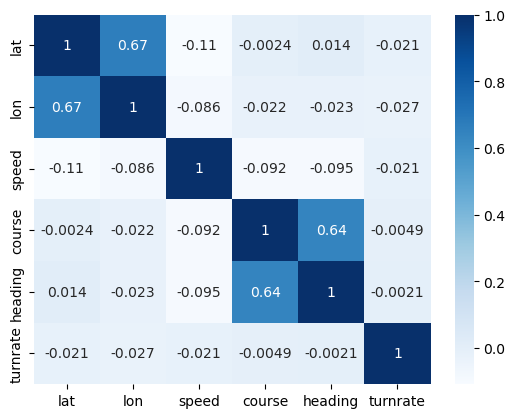

In [31]:
# heading과 course가 강한 양의 상관관계를 보이는 편이다.
# 회귀 분석시에는 악영향을 미칠 수 있다.(다중공선성 문제: feature 간 독립성 위배)
sns.heatmap(cor, cmap = "Blues", annot = True)

기간 별로 궤적은 특정 패턴을 그리는가?

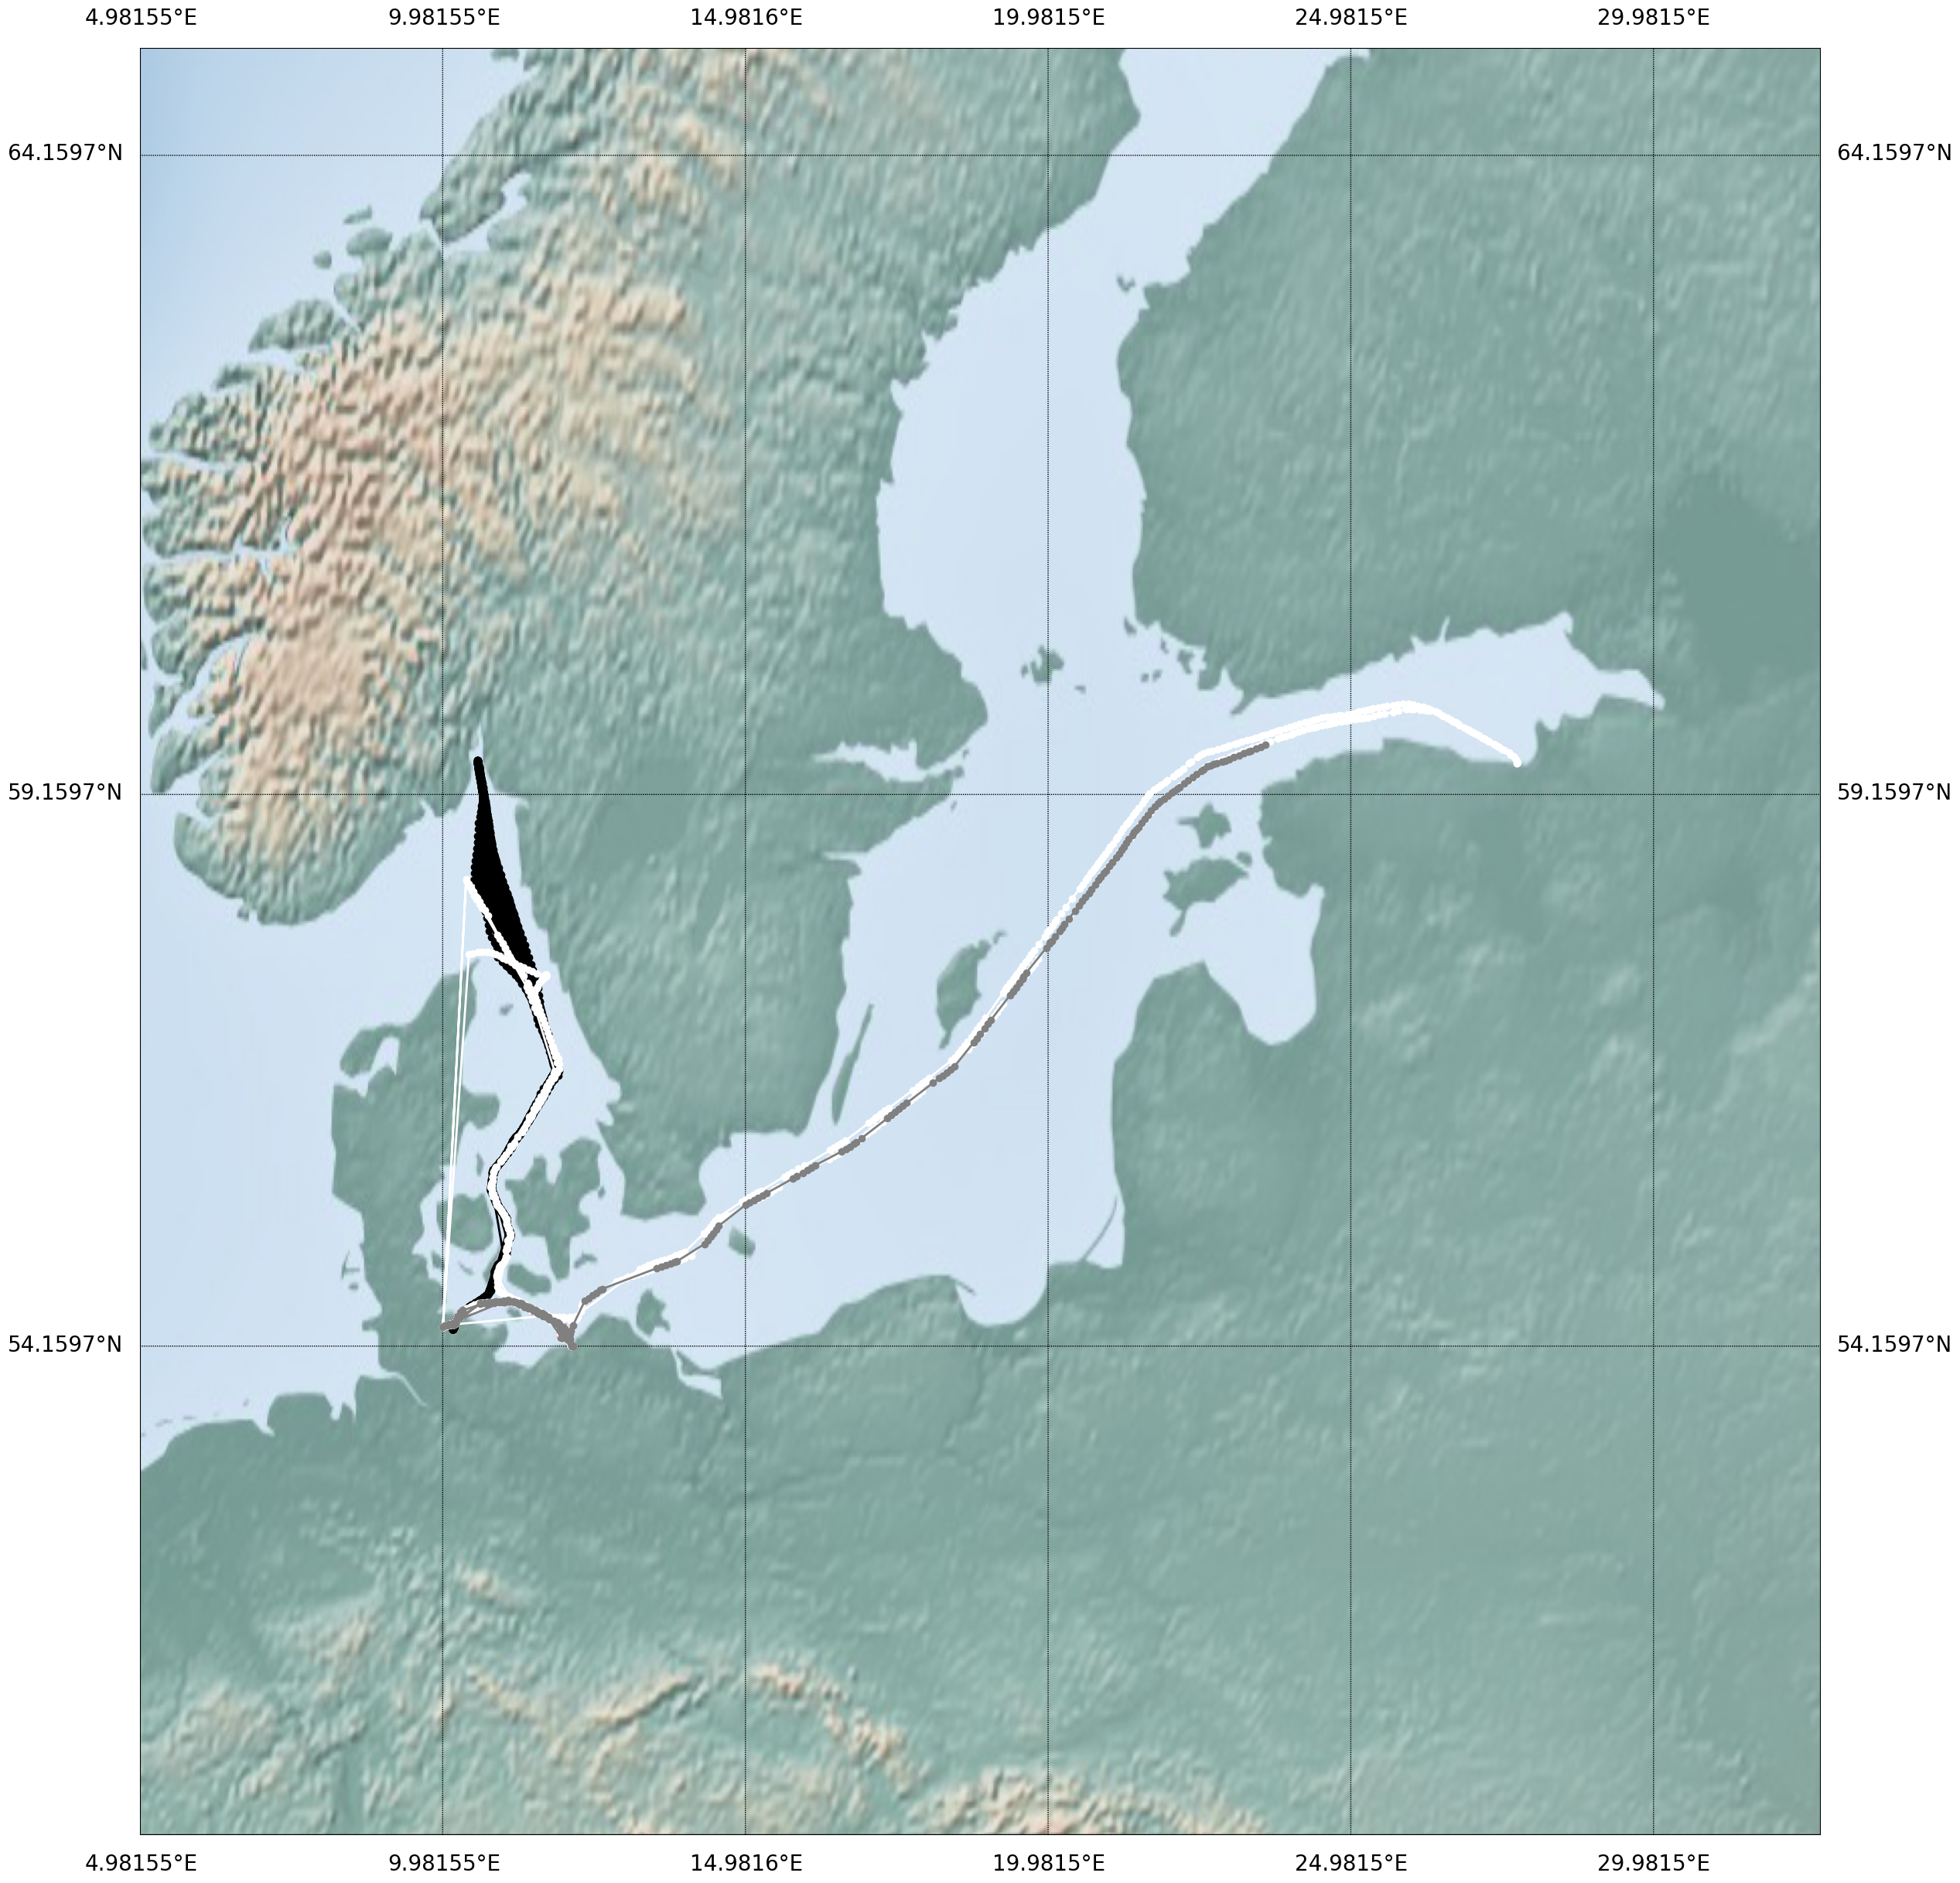

In [33]:
# BaseMap 그려보기
# 궤적을 찍어본다.
plt.figure(figsize=(30,30))
baltic_map = Basemap(projection="merc", 
                   resolution="l",
                   # 왼쪽 아래 모서리의 위도
                   llcrnrlat=min_lat-5,
                   # 오른쪽 위 모서리의 위도
                   urcrnrlat=max_lat+5, 
                   llcrnrlon=min_lon-5, 
                   urcrnrlon=max_lon+5)
# baltic_map.drawcountries()
p = np.arange(min_lat - 5, max_lat + 5, 5)
m = np.arange(min_lon - 5, max_lon + 5, 5)
# x축 격자 만들기
baltic_map.drawparallels(p, fontsize = 20, labels = [1,1,1,1])
# y축 격자
baltic_map.drawmeridians(m, fontsize = 20, labels = [1,1,1,1])
# baltic_map.drawcoastlines()
baltic_map.shadedrelief()
lon, lat = baltic_map(check1.loc[:, "lon"], check1.loc[:, "lat"])
lon2, lat2 = baltic_map(check2.loc[:, "lon"], check2.loc[:, "lat"])
lon3, lat3 = baltic_map(check3.loc[:, "lon"], check3.loc[:, "lat"])
lon4, lat4 = baltic_map(check4.loc[:, "lon"], check4.loc[:, "lat"])
# location = check.loc[:, ("lat", "lon")]
# 가로축: lon, 세로축: lat
# 2017-11 ~ 2018.01
plt.plot(lon, lat, c = "black", alpha = 1, linewidth = 2, marker = "o")
# 2018.02 ~ 2018.05
plt.plot(lon2, lat2, c = "red", alpha = 1, linewidth = 5, marker = "o")
# 2018.06 ~ 2018.09
plt.plot(lon3, lat3, c = "white", alpha = 1, linewidth = 2, marker = "o")
# 2018.09 ~ 2018.12
plt.plot(lon4, lat4, c = "gray", alpha = 1, linewidth = 2, marker = "o")
plt.show()

해당 데이터를 통해 생각해 봐야 할 점
1. AIS 데이터를 다음과 같이 확보하면 현재의 위치를 기반으로 해서 heading, 평균 speed 등 조건들을 고려하여 다음의 위.경도를 예측 가능하여 목표 지점까지의 남는 시간 계산하는 방향도 괜찮을 것 같다. 배의 속도와 기상 간의 상관 관계, 선박 type별로 speed에 대해서도 분석을 진행해 봐야 한다.
- 힘들 것으로 생각되지만 예측 가능하다면 예측 모델은 뭐로 해야 하는가?
    - 시계열 분석(LSTM, GRU, Transformer(encoder 부분))
        - 일정 항로 패턴을 보이는 경우는 시간 정보를 반영하는 게 맞다고 생각한다
    - 회귀 분석(TabNetRegressor, LGBM, XGBRegressor, Neural network 등)
        - 위, 경도를 feature를 통해서 예측을 한다.
        - Neural Network 구성 -> 적절한 weight를 찾아 계산하도록 한다.
        - 머신러닝 모델
2. AIS 데이터의 범위는 어디까지로 해야 하는가?
- 단순 국내 AIS 데이터 확보로는 부족할 수도 있다고 생각한다
    - 국내 AIS 데이터만 확보를 하면 시나리오를 우리 해역에 진입하여 우리나라 항구에 언제쯤 입항하는지에 대해 예측하는 정도
    - 만약에 우리 해역 안에 들어온 경우에 대해서 예측을 진행하면 모델의 정확도를 올리는 측면으로 진행하는 것은 어떤지?
※ 일단 open 사이트인 AIShub에 요청은 넣어 뒀습니다